In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:

# Get today's date and data 5 years ago
end_date = pd.Timestamp.today()
start_date = end_date - pd.DateOffset(years=5)

In [3]:
# Download stock data from Yahoo Finance
pltr = yf.download('PLTR', start=start_date, end=end_date)
aapl = yf.download('AAPL', start=start_date, end=end_date)
spy = yf.download('SPY', start=start_date, end=end_date)
gld = yf.download('GLD', start=start_date, end=end_date)

C:\Users\Vanessa\AppData\Local\Temp\ipykernel_12036\2431470963.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  pltr = yf.download('PLTR', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\Vanessa\AppData\Local\Temp\ipykernel_12036\2431470963.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl = yf.download('AAPL', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\Vanessa\AppData\Local\Temp\ipykernel_12036\2431470963.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy = yf.download('SPY', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\Vanessa\AppData\Local\Temp\ipykernel_12036\2431470963.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gld = yf.download('GLD

In [4]:
import os

os.makedirs('../data', exist_ok=True)

pltr.to_csv('../data/pltr.csv')
aapl.to_csv('../data/aapl.csv')
spy.to_csv('../data/spy.csv')
gld.to_csv('../data/gld.csv')

In [5]:
display (pltr.head())
display (aapl.head())
display (spy.head())
display (gld.head())


Price,Close,High,Low,Open,Volume
Ticker,PLTR,PLTR,PLTR,PLTR,PLTR
Date,,,,,
2021-02-11,33.110001,35.980000,32.610001,35.790001,52094900
2021-02-12,31.910000,33.650002,31.340000,33.360001,60925600
2021-02-16,27.840000,30.440001,27.299999,30.020000,180294300
2021-02-17,27.080000,29.730000,27.000000,27.990000,151007000
2021-02-18,25.170000,26.309999,24.500000,24.990000,313175100


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2021-02-11,131.616013,132.843242,130.291378,132.365978,64280000
2021-02-12,131.849777,132.005620,130.213472,130.856312,60145100
2021-02-16,129.726486,132.473146,129.336879,131.966679,80576300
2021-02-17,127.437569,128.781687,126.103200,127.836910,97918500
2021-02-18,126.336960,126.619412,124.096767,125.840213,96856700


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2021-02-11,364.718536,365.633353,362.282177,365.213278,42913300
2021-02-12,366.520111,366.762796,363.841010,363.915704,50593300
2021-02-16,366.202759,367.948383,365.483992,367.752333,50972400
2021-02-17,366.286865,366.538894,363.430401,364.447915,52290600
2021-02-18,364.727936,365.474706,361.946166,363.673103,59712800


Price,Close,High,Low,Open,Volume
Ticker,GLD,GLD,GLD,GLD,GLD
Date,,,,,
2021-02-11,171.210007,172.869995,170.710007,172.699997,5994500
2021-02-12,170.690002,171.649994,169.880005,170.289993,6018900
2021-02-16,168.240005,170.070007,167.729996,168.139999,14761100
2021-02-17,166.330002,167.339996,165.850006,166.919998,11400700
2021-02-18,166.320007,167.300003,165.729996,166.979996,7498200


In [6]:
# print summary statistics for each stocks
display(pltr.describe())
display(aapl.describe())
display(spy.describe())
display(gld.describe())

Price,Close,High,Low,Open,Volume
Ticker,PLTR,PLTR,PLTR,PLTR,PLTR
count,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,46.529382,47.591684,45.365582,46.525652,5.895947e+07
std,54.376089,55.497728,53.153971,54.460060,4.036612e+07
min,6.000000,6.170000,5.920000,5.980000,1.082440e+07
25%,12.990000,13.420000,12.695000,13.015000,3.402175e+07
50%,22.450001,22.790001,21.790001,22.299999,4.688640e+07
75%,55.705000,56.080000,52.580000,54.504999,6.926370e+07
max,207.179993,207.520004,201.820007,205.044998,4.502905e+08


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,182.202411,183.990321,180.240592,182.023722,6.866059e+07
std,41.127106,41.386463,40.824712,41.099856,2.932954e+07
min,113.334122,117.269072,113.188021,115.934688,1.791060e+07
25%,147.618126,148.813185,145.546442,147.015150,4.804070e+07
50%,173.427475,175.304582,171.529722,173.279240,6.175830e+07
75%,213.315872,215.529231,211.233243,213.270708,8.247705e+07
max,285.922455,288.350192,283.035157,285.932471,3.186799e+08


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
count,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,477.105526,479.623634,474.149851,477.000046,7.637721e+07
std,98.877840,98.942077,98.719247,98.916471,2.924012e+07
min,341.182068,344.301478,333.096538,334.149103,2.604870e+07
25%,395.821686,398.213818,393.387505,396.149461,5.731530e+07
50%,435.097168,437.275742,432.414415,434.893811,7.192720e+07
75%,559.336945,561.788527,555.946453,558.569051,8.976350e+07
max,695.489990,697.840027,693.940002,697.049988,2.566114e+08


Price,Close,High,Low,Open,Volume
Ticker,GLD,GLD,GLD,GLD,GLD
count,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,216.786382,217.766438,215.644255,216.764510,8.844211e+06
std,69.345927,69.886616,68.540745,69.369292,6.014193e+06
min,151.229996,151.960007,150.570007,150.699997,1.436500e+06
25%,169.360001,169.930000,168.604996,169.285004,5.559300e+06
50%,183.089996,183.559998,181.960007,182.649994,7.396500e+06
75%,244.424995,245.275002,243.599998,244.570000,1.018685e+07
max,495.899994,509.700012,481.250000,509.510010,8.659350e+07


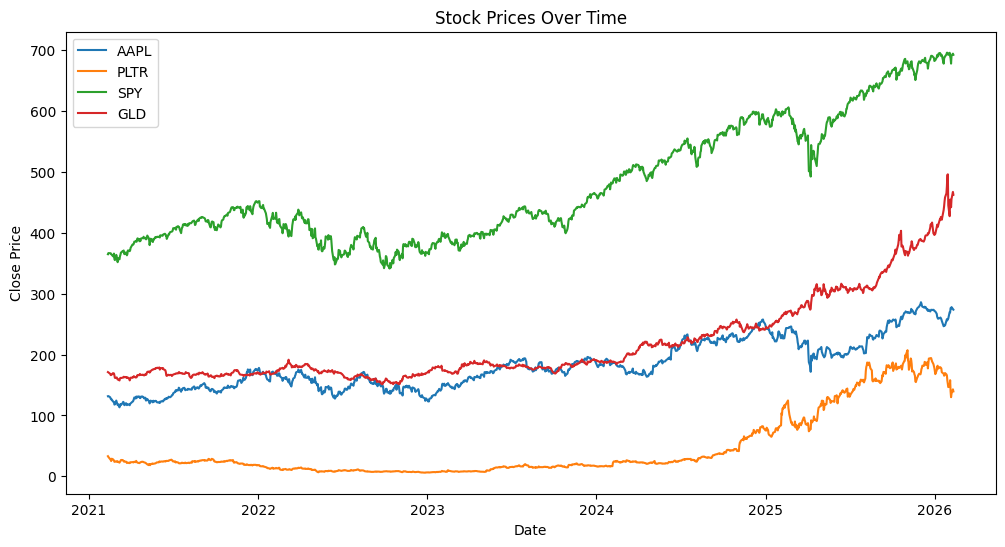

In [7]:
plt.figure(figsize = (12,6))
plt.plot(aapl.index, aapl['Close'], label='AAPL')
plt.plot(pltr.index, pltr['Close'], label='PLTR')
plt.plot(spy.index, spy['Close'], label='SPY')
plt.plot(gld.index, gld['Close'], label='GLD')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [8]:
# Create a new column Price Difference
pltr['Price Difference'] = pltr['Close'].shift(-1) - pltr['Close']
aapl['Price Difference'] = aapl['Close'].shift(-1) - aapl['Close']
spy['Price Difference'] = spy['Close'].shift(-1) - spy['Close']
gld['Price Difference'] = gld['Close'].shift(-1) - gld['Close']

#Display the first few rows of each dataframe to verify the new column
display(pltr.head())
display(aapl.head())
display(spy.head())
display(gld.head())

Price,Close,High,Low,Open,Volume,Price Difference
Ticker,PLTR,PLTR,PLTR,PLTR,PLTR,
Date,,,,,,
2021-02-11,33.110001,35.980000,32.610001,35.790001,52094900,-1.200001
2021-02-12,31.910000,33.650002,31.340000,33.360001,60925600,-4.070000
2021-02-16,27.840000,30.440001,27.299999,30.020000,180294300,-0.760000
2021-02-17,27.080000,29.730000,27.000000,27.990000,151007000,-1.910000
2021-02-18,25.170000,26.309999,24.500000,24.990000,313175100,3.830000


Price,Close,High,Low,Open,Volume,Price Difference
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2021-02-11,131.616013,132.843242,130.291378,132.365978,64280000,0.233765
2021-02-12,131.849777,132.005620,130.213472,130.856312,60145100,-2.123291
2021-02-16,129.726486,132.473146,129.336879,131.966679,80576300,-2.288918
2021-02-17,127.437569,128.781687,126.103200,127.836910,97918500,-1.100609
2021-02-18,126.336960,126.619412,124.096767,125.840213,96856700,0.155823


Price,Close,High,Low,Open,Volume,Price Difference
Ticker,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,
2021-02-11,364.718536,365.633353,362.282177,365.213278,42913300,1.801575
2021-02-12,366.520111,366.762796,363.841010,363.915704,50593300,-0.317352
2021-02-16,366.202759,367.948383,365.483992,367.752333,50972400,0.084106
2021-02-17,366.286865,366.538894,363.430401,364.447915,52290600,-1.558929
2021-02-18,364.727936,365.474706,361.946166,363.673103,59712800,-0.644165


Price,Close,High,Low,Open,Volume,Price Difference
Ticker,GLD,GLD,GLD,GLD,GLD,
Date,,,,,,
2021-02-11,171.210007,172.869995,170.710007,172.699997,5994500,-0.520004
2021-02-12,170.690002,171.649994,169.880005,170.289993,6018900,-2.449997
2021-02-16,168.240005,170.070007,167.729996,168.139999,14761100,-1.910004
2021-02-17,166.330002,167.339996,165.850006,166.919998,11400700,-0.009995
2021-02-18,166.320007,167.300003,165.729996,166.979996,7498200,0.689987


In [9]:
# Create a new column for daily returns
pltr['Daily Return'] = pltr['Close'].pct_change()
aapl['Daily Return'] = aapl['Close'].pct_change()
spy['Daily Return'] = spy['Close'].pct_change()
gld['Daily Return'] = gld['Close'].pct_change()

display(pltr.head())


Price,Close,High,Low,Open,Volume,Price Difference,Daily Return
Ticker,PLTR,PLTR,PLTR,PLTR,PLTR,,
Date,,,,,,,
2021-02-11,33.110001,35.980000,32.610001,35.790001,52094900,-1.200001,NaN
2021-02-12,31.910000,33.650002,31.340000,33.360001,60925600,-4.070000,-0.036243
2021-02-16,27.840000,30.440001,27.299999,30.020000,180294300,-0.760000,-0.127546
2021-02-17,27.080000,29.730000,27.000000,27.990000,151007000,-1.910000,-0.027299
2021-02-18,25.170000,26.309999,24.500000,24.990000,313175100,3.830000,-0.070532


In [10]:
# Create a new column Direction
# Direction = 1 if Price Difference > 0 else 0
pltr['Direction'] = np.where(pltr['Price Difference'] > 0, 1, 0)
aapl['Direction'] = np.where(aapl['Price Difference'] > 0, 1, 0)
spy['Direction'] = np.where(spy['Price Difference'] > 0, 1, 0)
gld['Direction'] = np.where(gld['Price Difference'] > 0, 1, 0)
display(pltr.head())


Price,Close,High,Low,Open,Volume,Price Difference,Daily Return,Direction
Ticker,PLTR,PLTR,PLTR,PLTR,PLTR,,,
Date,,,,,,,,
2021-02-11,33.110001,35.980000,32.610001,35.790001,52094900,-1.200001,NaN,0
2021-02-12,31.910000,33.650002,31.340000,33.360001,60925600,-4.070000,-0.036243,0
2021-02-16,27.840000,30.440001,27.299999,30.020000,180294300,-0.760000,-0.127546,0
2021-02-17,27.080000,29.730000,27.000000,27.990000,151007000,-1.910000,-0.027299,0
2021-02-18,25.170000,26.309999,24.500000,24.990000,313175100,3.830000,-0.070532,1


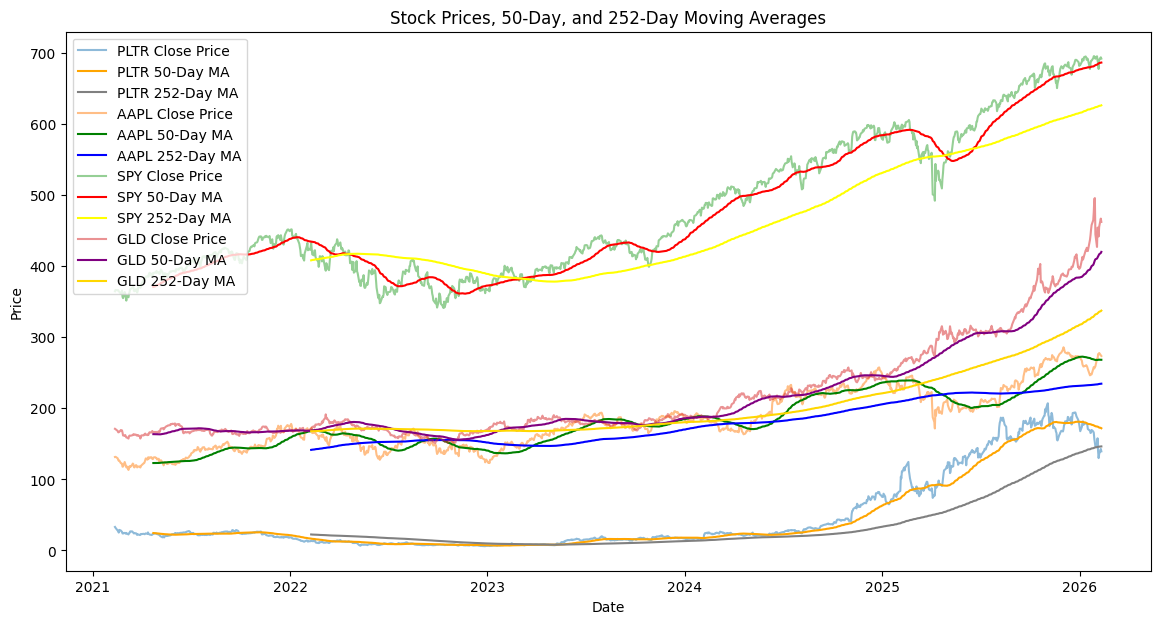

In [11]:
pltr['ma50'] = pltr['Close'].rolling(window=50).mean()
aapl['ma50'] = aapl['Close'].rolling(window=50).mean()
spy['ma50'] = spy['Close'].rolling(window=50).mean()
gld['ma50'] = gld['Close'].rolling(window=50).mean()
pltr['ma252'] = pltr['Close'].rolling(window=252).mean()
aapl['ma252'] = aapl['Close'].rolling(window=252).mean()
spy['ma252'] = spy['Close'].rolling(window=252).mean()
gld['ma252'] = gld['Close'].rolling(window=252).mean()

# Plot the closing prices and 50-day moving averages
plt.figure(figsize=(14, 7))
plt.plot(pltr.index, pltr['Close'], label='PLTR Close Price', alpha=0.5)
plt.plot(pltr.index, pltr['ma50'], label='PLTR 50-Day MA', color='orange')
plt.plot(pltr.index, pltr['ma252'], label='PLTR 252-Day MA', color='grey')
plt.plot(aapl.index, aapl['Close'], label='AAPL Close Price', alpha=0.5)
plt.plot(aapl.index, aapl['ma50'], label='AAPL 50-Day MA', color='green')
plt.plot(aapl.index, aapl['ma252'], label='AAPL 252-Day MA', color='blue')
plt.plot(spy.index, spy['Close'], label='SPY Close Price', alpha=0.5)
plt.plot(spy.index, spy['ma50'], label='SPY 50-Day MA', color='red')
plt.plot(spy.index, spy['ma252'], label='SPY 252-Day MA', color='yellow')
plt.plot(gld.index, gld['Close'], label='GLD Close Price', alpha=0.5)
plt.plot(gld.index, gld['ma50'], label='GLD 50-Day MA', color='purple')
plt.plot(gld.index, gld['ma252'], label='GLD 252-Day MA', color='gold')
plt.title('Stock Prices, 50-Day, and 252-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Distribution of Log Return PLTR

In [12]:
# Calculate the log daily return from each stock
# PLTR data log daily return
pltr['Log Daily Return'] = np.log(pltr['Close']).shift(1) - np.log(pltr['Close'])
# AAPL data log daily return
aapl['Log Daily Return'] = np.log(aapl['Close']).shift(1) - np.log(aapl['Close'])
# SPY data log daily return
spy['Log Daily Return'] = np.log(spy['Close']).shift(1) - np.log(spy['Close'])
# GLD data log daily return
gld['Log Daily Return'] = np.log(gld['Close']).shift(1) - np.log(gld['Close'])


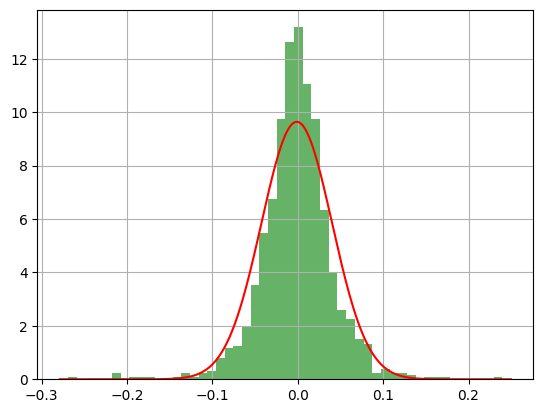

In [13]:
# Plot a histogram to show the distribution of log return of PLTR's stock. 
from scipy.stats import norm
mu = pltr['Log Daily Return'].mean()
sigma = pltr['Log Daily Return'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(pltr['Log Daily Return'].min()-0.01, pltr['Log Daily Return'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

pltr['Log Daily Return'].hist(bins=50, density=True, alpha=0.6, color='green')
plt.plot(density['x'], density['pdf'], 'r')
plt.show()

Calculate the Probability of the PLTR stockprice will drop over a certain percentage in a day

In [14]:
# probability that the stock price of PLTR will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print(f"The probability that the stock price of PLTR will drop over 5% in a day is {prob_return1:.4f}")

The probability that the stock price of PLTR will drop over 5% in a day is 0.1189


Calculate the Probability of the stockprice will drop over a certain percentage in a year

In [15]:
# drop over 40% in 220 days
prob_return2 = norm.cdf(-0.40, 220*mu, np.sqrt(220)*sigma)
print(f"The probability that the stock price of PLTR will drop over 40% in 220 days is {prob_return2:.4f}")


The probability that the stock price of PLTR will drop over 40% in 220 days is 0.4049


In [16]:
# drop over 20% in 220 days
prob_return2 = norm.cdf(-0.20,220*mu,np.sqrt(220)*sigma)
print(f"The probability that the stock price of PLTR will drop over 20% in 220 days is {prob_return2:.4f}")


The probability that the stock price of PLTR will drop over 20% in 220 days is 0.5340


Calculate Value at Risk (VaR)

In [17]:
# Calculate Value at Risk (VaR)
confidence_level = 0.95
VaR_95 = norm.ppf(1 - confidence_level, mu, sigma)
print(f"The 1-day VaR at 95% confidence level is {VaR_95:.4f}")


The 1-day VaR at 95% confidence level is -0.0692


In [18]:
confidence_level = 0.5
VaR_50 = norm.ppf(1 - confidence_level, mu, sigma)
print(f"The 1-day VaR at 50% confidence level is {VaR_50:.4f}")


The 1-day VaR at 50% confidence level is -0.0011


In [19]:
#Quantile
# 25% Quantile
quantile_25 = norm.ppf(0.25, mu, sigma)
print(f"The 25% quantile of the daily log return is {quantile_25:.4f}")
# 75% Quantile
quantile_75 = norm.ppf(0.75, mu, sigma)
print(f"The 75% quantile of the daily log return is {quantile_75:.4f}")


The 25% quantile of the daily log return is -0.0291
The 75% quantile of the daily log return is 0.0268


AAPL STOCK HISTOGRAM

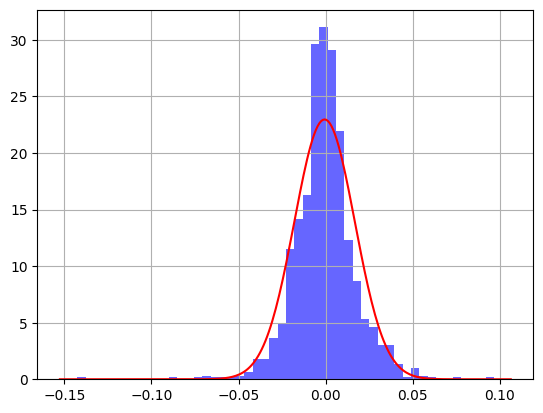

In [20]:
# Plot a histogram to show the distribution of log return of AAPL's stock. 
from scipy.stats import norm
mu = aapl['Log Daily Return'].mean()
sigma = aapl['Log Daily Return'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(aapl['Log Daily Return'].min()-0.01, aapl['Log Daily Return'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

aapl['Log Daily Return'].hist(bins=50, density=True, alpha=0.6, color='blue')
plt.plot(density['x'], density['pdf'], 'r')
plt.show()



Calculate the Probability of the AAPL stockprice will drop over a certain percentage in a day

In [21]:
# probability that the stock price of AAPL will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print(f"The probability that the stock price of AAPL will drop over 5% in a day is {prob_return1:.4f}")

The probability that the stock price of AAPL will drop over 5% in a day is 0.0022


Calculate the Probability of the AAPL stockprice will drop over a certain percentage in a year

In [22]:
# probability that the stock price of AAPL will drop over 40% in 220 days
prob_return2 = norm.cdf(-0.40, 220*mu, np.sqrt(220)*sigma)
print(f"The probability that the stock price of AAPL will drop over 40% in 220 days is {prob_return2:.4f}")

The probability that the stock price of AAPL will drop over 40% in 220 days is 0.1459


In [23]:
# probability that the stock price of AAPL will drop over 20% in 220 days
prob_return2 = norm.cdf(-0.20,220*mu,np.sqrt(220)*sigma)
print(f"The probability that the stock price of AAPL will drop over 20% in 220 days is {prob_return2:.4f}")


The probability that the stock price of AAPL will drop over 20% in 220 days is 0.3906


Calculate AAPL VaR

In [24]:
# Calculate Value at Risk (VaR) for AAPL
confidence_level = 0.95
VaR_95 = norm.ppf(1 - confidence_level, mu, sigma)
print(f"The 1-day VaR at 95% confidence level for AAPL is {VaR_95:.4f}")

The 1-day VaR at 95% confidence level for AAPL is -0.0292


In [25]:
confidence_level = 0.5
VaR_50 = norm.ppf(1 - confidence_level, mu, sigma)
print(f"The 1-day VaR at 50% confidence level for AAPL is {VaR_50:.4f}")

The 1-day VaR at 50% confidence level for AAPL is -0.0006


In [26]:
# Quantile
# 25% Quantile
quantile_25 = norm.ppf(0.25, mu, sigma)
print(f"The 25% quantile of the daily log return for AAPL is {quantile_25:.4f}")
# 75% Quantile
quantile_75 = norm.ppf(0.75, mu, sigma)
print(f"The 75% quantile of the daily log return for AAPL is {quantile_75:.4f}")


The 25% quantile of the daily log return for AAPL is -0.0123
The 75% quantile of the daily log return for AAPL is 0.0111


SPY STOCK HISTOGRAM

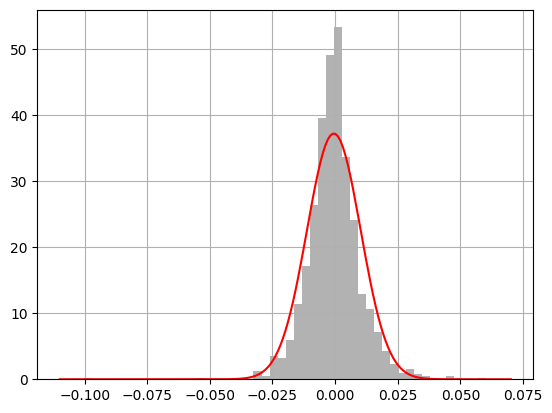

In [27]:
# Plot a histogram to show the distribution of log return of SPY's stock. 
from scipy.stats import norm
mu = spy['Log Daily Return'].mean()
sigma = spy['Log Daily Return'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(spy['Log Daily Return'].min()-0.01, spy['Log Daily Return'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

spy['Log Daily Return'].hist(bins=50, density=True, alpha=0.6, color='grey')
plt.plot(density['x'], density['pdf'], 'r')
plt.show()



Calculate the Probability of the SPY stockprice will drop over a certain percentage in a day

In [28]:
# probability that the stock price of SPY will drop over 5% in a day
prob_return1 = norm.cdf(-0.05,mu,sigma)
print(f"The probability that the stock price of SPY will drop over 5% in a day is {prob_return1:.4f}")

The probability that the stock price of SPY will drop over 5% in a day is 0.0000


Calculate the Probability of the SPY stockprice will drop over a certain percentage in a year

In [29]:
# probability that the stock price of SPY will drop over 40% in 220 days
prob_return2 = norm.cdf(-0.40, 220*mu, np.sqrt(220)*sigma)
print(f"The probability that the stock price of SPY will drop over 40% in 220 days is {prob_return2:.4f}")


The probability that the stock price of SPY will drop over 40% in 220 days is 0.0353


In [30]:
# probability that the stock price of SPY will drop over 20% in 220 days
prob_return2 = norm.cdf(-0.20,220*mu,np.sqrt(220)*sigma)
print(f"The probability that the stock price of SPY will drop over 20% in 220 days is {prob_return2:.4f}")

The probability that the stock price of SPY will drop over 20% in 220 days is 0.2909


Calculate the SPY Value at Risk VaR

In [31]:
# Calculate Value at Risk (VaR) for SPY
confidence_level = 0.95
VaR_95 = norm.ppf(1 - confidence_level, mu, sigma)
print(f"The 1-day VaR at 95% confidence level for SPY is {VaR_95:.4f}")


The 1-day VaR at 95% confidence level for SPY is -0.0182


In [32]:
confidence_level = 0.5
VaR_50 = norm.ppf(1 - confidence_level, mu, sigma)
print(f"The 1-day VaR at 50% confidence level for SPY is {VaR_50:.4f}")

The 1-day VaR at 50% confidence level for SPY is -0.0005


In [33]:
#Quantile
# 25% Quantile
quantile_25 = norm.ppf(0.25, mu, sigma)
print(f"The 25% quantile of the daily log return for SPY is {quantile_25:.4f}")
# 75% Quantile
quantile_75 = norm.ppf(0.75, mu, sigma)
print(f"The 75% quantile of the daily log return for SPY is {quantile_75:.4f}")


The 25% quantile of the daily log return for SPY is -0.0077
The 75% quantile of the daily log return for SPY is 0.0067


THE HISTOGRAM OF GLD

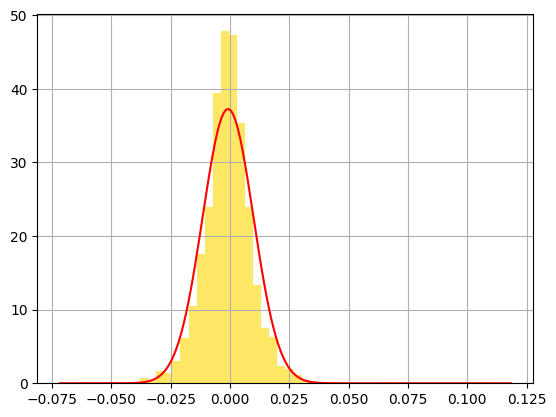

In [34]:
# Create the histogram of GLD
from scipy.stats import norm
mu = gld['Log Daily Return'].mean()
sigma = gld['Log Daily Return'].std(ddof=1)
density = pd.DataFrame()
density['x'] = np.arange(gld['Log Daily Return'].min()-0.01, gld['Log Daily Return'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)
gld['Log Daily Return'].hist(bins=50, density=True, alpha=0.6, color='gold')
plt.plot(density['x'], density['pdf'], 'r')
plt.show()


Calculate the Probability of the GLD stockprice will drop over a certain percentage in a day

In [35]:
#probability that the stock price of GLD will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print(f"The probability that the stock price of GLD will drop over 5% in a day is {prob_return1:.4f}")

The probability that the stock price of GLD will drop over 5% in a day is 0.0000


Calculate the Probability of the GLD stockprice will drop over a certain percentage in a year

In [36]:
#probability that the stock price of GLD will drop over 40% in 220 days
prob_return2 = norm.cdf(-0.40, 220*mu, np.sqrt(220)*sigma)
print(f"The probability that the stock price of GLD will drop over 40% in 220 days is {prob_return2:.4f}")

The probability that the stock price of GLD will drop over 40% in 220 days is 0.0775


In [37]:
# probability that the stock price of GLD will drop over 20% in 220 days
prob_return2 = norm.cdf(-0.20,220*mu,np.sqrt(220)*sigma)
print(f"The probability that the stock price of GLD will drop over 20% in 220 days is {prob_return2:.4f}")

The probability that the stock price of GLD will drop over 20% in 220 days is 0.4357


Calculate Value at Risk (VaR) GLD

In [38]:
# Calculate Value at Risk (VaR) for GLD
confidence_level = 0.95
VaR_95 = norm.ppf(1 - confidence_level, mu, sigma)
print(f"The 1-day VaR at 95% confidence level for GLD is {VaR_95:.4f}")

The 1-day VaR at 95% confidence level for GLD is -0.0184


In [39]:
confidence_level = 0.5
VaR_50 = norm.ppf(1 - confidence_level, mu, sigma)
print(f"The 1-day VaR at 50% confidence level for AAPL is {VaR_50:.4f}")

The 1-day VaR at 50% confidence level for AAPL is -0.0008


In [40]:
# Quantile
# 25% Quantile
quantile_25 = norm.ppf(0.25, mu, sigma)
print(f"The 25% quantile of the daily log return for GLD is {quantile_25:.4f}")
# 75% Quantile
quantile_75 = norm.ppf(0.75, mu, sigma)
print(f"The 75% quantile of the daily log return for GLD is {quantile_75:.4f}")

The 25% quantile of the daily log return for GLD is -0.0080
The 75% quantile of the daily log return for GLD is 0.0064


COVARIANCE

In [41]:
# Create a DataFrame to hold the log daily returns of all stocks
log_returns = pd.DataFrame({
    'PLTR': pltr['Log Daily Return'],
    'AAPL': aapl['Log Daily Return'],
    'SPY': spy['Log Daily Return'],
    'GLD': gld['Log Daily Return']
})  
display(log_returns.head())

,PLTR,AAPL,SPY,GLD
Date,,,,
2021-02-11,NaN,NaN,NaN,NaN
2021-02-12,0.036916,-0.001775,-0.004927,0.003042
2021-02-16,0.136446,0.016235,0.000866,0.014457
2021-02-17,0.027678,0.017802,-0.000230,0.011418
2021-02-18,0.073143,0.008674,0.004265,0.000060


In [42]:
# Covariance matrix
cov_matrix = log_returns.cov()
display(cov_matrix)


,PLTR,AAPL,SPY,GLD
PLTR,0.001712,0.000279,0.000240,0.000038
AAPL,0.000279,0.000302,0.000141,0.000009
SPY,0.000240,0.000141,0.000115,0.000013
GLD,0.000038,0.000009,0.000013,0.000115


In [43]:
# Correlation matrix
corr_matrix = log_returns.corr()
display(corr_matrix)

,PLTR,AAPL,SPY,GLD
PLTR,1.000000,0.387915,0.539694,0.084894
AAPL,0.387915,1.000000,0.758381,0.047557
SPY,0.539694,0.758381,1.000000,0.117462
GLD,0.084894,0.047557,0.117462,1.000000


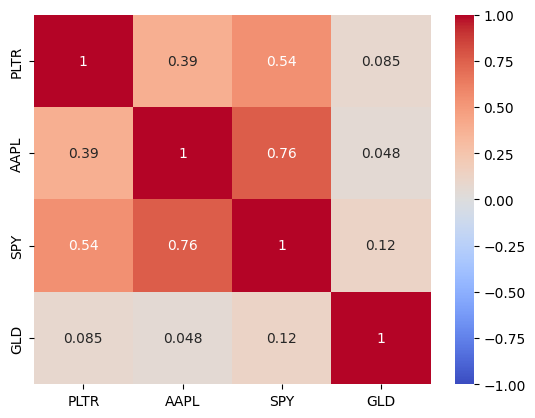

In [44]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

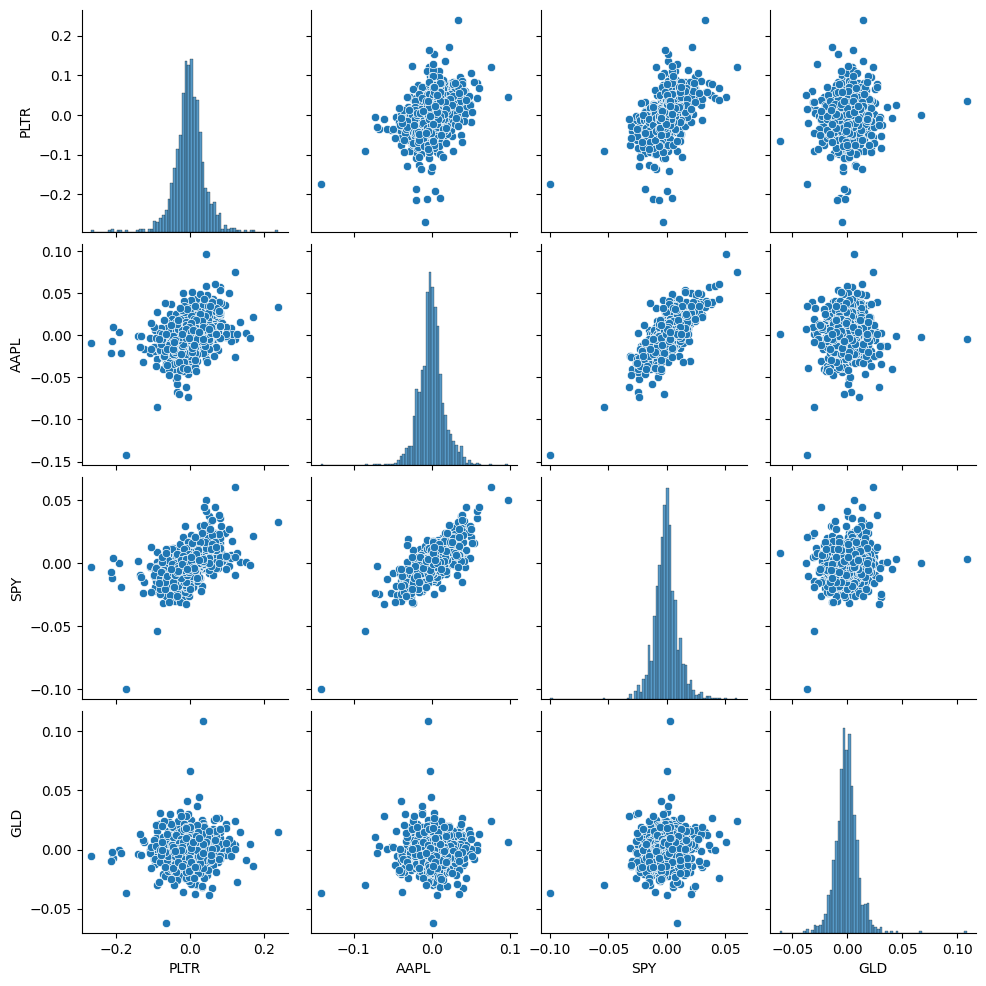

In [45]:
# Scatter plot matrix
sns.pairplot(log_returns)
plt.show()



In [46]:
# MonteCarlo Simulation for Portfolio Risk Assessment
num_simulations = 10000
num_days = 252  # Number of trading days in a year
results = np.zeros((num_simulations, num_days))
initial_investment = 100000  # Initial investment amount
for i in range(num_simulations):
    daily_returns = np.random.multivariate_normal(log_returns.mean(), cov_matrix, num_days)
    price_paths = initial_investment * np.exp(np.cumsum(daily_returns, axis=0))
    results[i] = price_paths[:, 0]  # Assuming we are tracking PLTR
# Calculate the 5th percentile of the final portfolio values
final_portfolio_values = results[:, -1]
VaR_95 = np.percentile(final_portfolio_values, 5)
print(f"The 1-year VaR at 95% confidence level for the portfolio is {initial_investment - VaR_95:.2f}")


The 1-year VaR at 95% confidence level for the portfolio is 74555.00


Monte Carlo VaR PLTR ONLY

The 1-year VaR at 95% confidence level for the portfolio is 74230.88
The 1-year VaR at 90% confidence level for the portfolio is 66946.74
The 1-year VaR at 50% confidence level for the portfolio is 25449.63


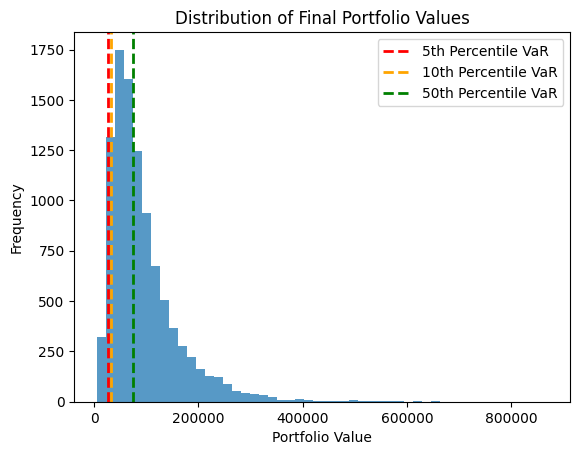

In [47]:
# Monte Carlo Simulation for Portfolio Risk Assessment (Log Returns)
num_simulations = 10000
num_days = 252  # Number of trading days in a year
results = np.zeros((num_simulations, num_days))
initial_investment = 100000  # Initial investment amount
for i in range(num_simulations):
    daily_returns = np.random.multivariate_normal(log_returns.mean(), cov_matrix, num_days)
    price_paths = initial_investment * np.exp(np.cumsum(daily_returns, axis=0))
    results[i] = price_paths[:, 0]  # Assuming we are tracking PLTR
# Calculate the percentage of the final portfolio values
final_portfolio_values = results[:, -1]
VaR_95 = np.percentile(final_portfolio_values, 5)
print(f"The 1-year VaR at 95% confidence level for the portfolio is {initial_investment - VaR_95:.2f}")
VaR_90 = np.percentile(final_portfolio_values, 10)
VaR_50 = np.percentile(final_portfolio_values, 50)
print(f"The 1-year VaR at 90% confidence level for the portfolio is {initial_investment - VaR_90:.2f}")
print(f"The 1-year VaR at 50% confidence level for the portfolio is {initial_investment - VaR_50:.2f}")

# Plot the distribution of final portfolio values
plt.hist(final_portfolio_values, bins=50, alpha=0.75)
plt.axvline(VaR_95, color='r', linestyle='dashed', linewidth=2, label='5th Percentile VaR')
plt.axvline(VaR_90, color='orange', linestyle='dashed', linewidth=2, label='10th Percentile VaR')
plt.axvline(VaR_50, color='green', linestyle='dashed', linewidth=2, label='50th Percentile VaR')
plt.title('Distribution of Final Portfolio Values')
plt.xlabel('Portfolio Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [48]:
weights = np.array([0.25, 0.25, 0.25, 0.25])  # equal weights for PLTR, AAPL, SPY, GLD
portfolio_log_returns = log_returns.dot(weights)
portfolio_mu = portfolio_log_returns.mean()
portfolio_sigma = portfolio_log_returns.std(ddof=1)
print(f"Portfolio Mean Log Return: {portfolio_mu:.4f}")
print(f"Portfolio Standard Deviation of Log Return: {portfolio_sigma:.4f}")
# Calculate the 1-day VaR at 95% confidence level for the portfolio
confidence_level = 0.95
VaR_95 = norm.ppf(1 - confidence_level, portfolio_mu, portfolio_sigma)
print(f"The 1-day VaR at 95% confidence level for the portfolio is {VaR_95:.4f}")
# Calculate the 1-day VaR at 90% confidence level for the portfolio
confidence_level = 0.90
VaR_90 = norm.ppf(1 - confidence_level, portfolio_mu, portfolio_sigma)
print(f"The 1-day VaR at 90% confidence level for the portfolio is {VaR_90:.4f}")
# Calculate the 1-day VaR at 50% confidence level for the portfolio
confidence_level = 0.5
VaR_50 = norm.ppf(1 - confidence_level, portfolio_mu, portfolio_sigma)
print(f"The 1-day VaR at 50% confidence level for the portfolio is {VaR_50:.4f}")
# Quantile
# 25% Quantile
quantile_25 = norm.ppf(0.25, portfolio_mu, portfolio_sigma)
print(f"The 25% quantile of the daily log return for the portfolio is {quantile_25:.4f}")
# 75% Quantile
quantile_75 = norm.ppf(0.75, portfolio_mu, portfolio_sigma)
print(f"The 75% quantile of the daily log return for the portfolio is {quantile_75:.4f}")


Portfolio Mean Log Return: -0.0008
Portfolio Standard Deviation of Log Return: 0.0152
The 1-day VaR at 95% confidence level for the portfolio is -0.0257
The 1-day VaR at 90% confidence level for the portfolio is -0.0202
The 1-day VaR at 50% confidence level for the portfolio is -0.0008
The 25% quantile of the daily log return for the portfolio is -0.0110
The 75% quantile of the daily log return for the portfolio is 0.0095


In [49]:
weights = np.array([0.30, 0.30, 0.20, 0.20])  # 30%,30%,20%,20% weights for PLTR, AAPL, SPY, GLD
portfolio_log_returns = log_returns.dot(weights)
portfolio_mu = portfolio_log_returns.mean()
portfolio_sigma = portfolio_log_returns.std(ddof=1)
print(f"Portfolio Mean Log Return: {portfolio_mu:.4f}")
print(f"Portfolio Standard Deviation of Log Return: {portfolio_sigma:.4f}")
# Calculate the 1-day VaR at 95% confidence level for the portfolio
confidence_level = 0.95
VaR_95 = norm.ppf(1 - confidence_level, portfolio_mu, portfolio_sigma)
print(f"The 1-day VaR at 95% confidence level for the portfolio is {VaR_95:.4f}")
# Calculate the 1-day VaR at 90% confidence level for the portfolio
confidence_level = 0.90
VaR_90 = norm.ppf(1 - confidence_level, portfolio_mu, portfolio_sigma)
print(f"The 1-day VaR at 90% confidence level for the portfolio is {VaR_90:.4f}")
# Calculate the 1-day VaR at 50% confidence level for the portfolio
confidence_level = 0.5
VaR_50 = norm.ppf(1 - confidence_level, portfolio_mu, portfolio_sigma)
print(f"The 1-day VaR at 50% confidence level for the portfolio is {VaR_50:.4f}")
# Quantile
# 25% Quantile
quantile_25 = norm.ppf(0.25, portfolio_mu, portfolio_sigma)
print(f"The 25% quantile of the daily log return for the portfolio is {quantile_25:.4f}")
# 75% Quantile
quantile_75 = norm.ppf(0.75, portfolio_mu, portfolio_sigma)
print(f"The 75% quantile of the daily log return for the portfolio is {quantile_75:.4f}")


Portfolio Mean Log Return: -0.0008
Portfolio Standard Deviation of Log Return: 0.0171
The 1-day VaR at 95% confidence level for the portfolio is -0.0289
The 1-day VaR at 90% confidence level for the portfolio is -0.0227
The 1-day VaR at 50% confidence level for the portfolio is -0.0008
The 25% quantile of the daily log return for the portfolio is -0.0123
The 75% quantile of the daily log return for the portfolio is 0.0108


In [50]:
weights = np.array([0.40, 0.30, 0.20, 0.10]) # 40%,30%,20%,10% weights for PLTR, AAPL, SPY, GLD
portfolio_log_returns = log_returns.dot(weights)
portfolio_mu = portfolio_log_returns.mean()
portfolio_sigma = portfolio_log_returns.std(ddof=1)
print(f"Portfolio Mean Log Return: {portfolio_mu:.4f}")
print(f"Portfolio Standard Deviation of Log Return: {portfolio_sigma:.4f}")
# Calculate the 1-day VaR at 95% confidence level for the portfolio
confidence_level = 0.95
VaR_95 = norm.ppf(1 - confidence_level, portfolio_mu, portfolio_sigma)
print(f"The 1-day VaR at 95% confidence level for the portfolio is {VaR_95:.4f}")
# Calculate the 1-day VaR at 90% confidence level for the portfolio
confidence_level = 0.90
VaR_90 = norm.ppf(1 - confidence_level, portfolio_mu, portfolio_sigma)
print(f"The 1-day VaR at 90% confidence level for the portfolio is {VaR_90:.4f}")
# Calculate the 1-day VaR at 50% confidence level for the portfolio
confidence_level = 0.5
VaR_50 = norm.ppf(1 - confidence_level, portfolio_mu, portfolio_sigma)
print(f"The 1-day VaR at 50% confidence level for the portfolio is {VaR_50:.4f}")
# Quantile
# 25% Quantile
quantile_25 = norm.ppf(0.25, portfolio_mu, portfolio_sigma)
print(f"The 25% quantile of the daily log return for the portfolio is {quantile_25:.4f}")
# 75% Quantile
quantile_75 = norm.ppf(0.75, portfolio_mu, portfolio_sigma)
print(f"The 75% quantile of the daily log return for the portfolio is {quantile_75:.4f}")


Portfolio Mean Log Return: -0.0008
Portfolio Standard Deviation of Log Return: 0.0208
The 1-day VaR at 95% confidence level for the portfolio is -0.0350
The 1-day VaR at 90% confidence level for the portfolio is -0.0275
The 1-day VaR at 50% confidence level for the portfolio is -0.0008
The 25% quantile of the daily log return for the portfolio is -0.0149
The 75% quantile of the daily log return for the portfolio is 0.0132


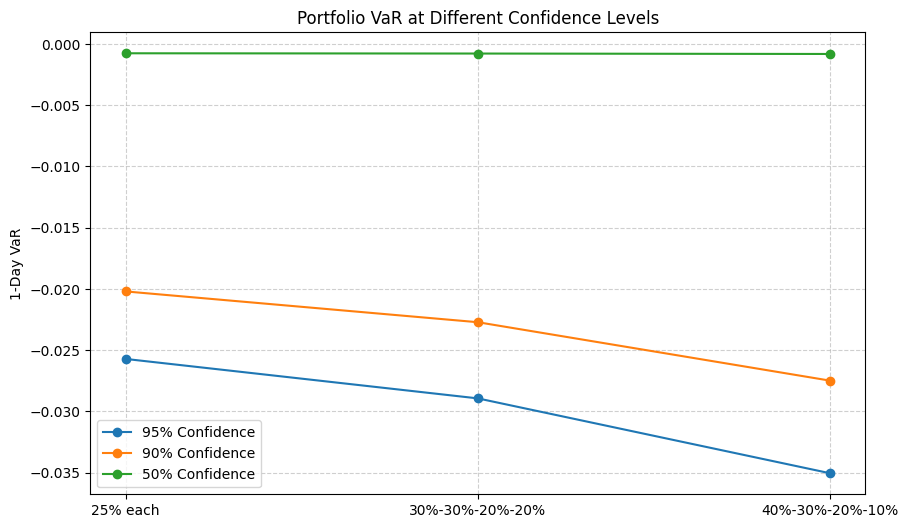

In [51]:
import matplotlib.pyplot as plt
import numpy as np

weights_list = [
    [0.25, 0.25, 0.25, 0.25],
    [0.30, 0.30, 0.20, 0.20],
    [0.40, 0.30, 0.20, 0.10]
]

labels = ['25% each', '30%-30%-20%-20%', '40%-30%-20%-10%']

VaR_dict = {"95%": [], "90%": [], "50%": []}

for weights in weights_list:
    portfolio_log_returns = log_returns.dot(weights)
    mu = portfolio_log_returns.mean()
    sigma = portfolio_log_returns.std(ddof=1)

    VaR_dict["95%"].append(norm.ppf(1 - 0.95, mu, sigma))
    VaR_dict["90%"].append(norm.ppf(1 - 0.90, mu, sigma))
    VaR_dict["50%"].append(norm.ppf(1 - 0.50, mu, sigma))

x = np.arange(len(labels))

plt.figure(figsize=(10,6))
plt.plot(x, VaR_dict["95%"], marker="o", label="95% Confidence")
plt.plot(x, VaR_dict["90%"], marker="o", label="90% Confidence")
plt.plot(x, VaR_dict["50%"], marker="o", label="50% Confidence")

plt.xticks(x, labels)
plt.ylabel("1-Day VaR")
plt.title("Portfolio VaR at Different Confidence Levels")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [52]:
weights = np.array([0.25, 0.25, 0.25, 0.25])  # Equal weights for PLTR, AAPL, SPY, GLD
portfolio_log_returns = log_returns.dot(weights)
portfolio_mu = portfolio_log_returns.mean()
portfolio_sigma = portfolio_log_returns.std(ddof=1)
print(f"Portfolio Mean Log Return: {portfolio_mu:.4f}")
print(f"Portfolio Standard Deviation of Log Return: {portfolio_sigma:.4f}")

# Calculate the 252-day VaR at 95% confidence level for the portfolio
confidence_level = 0.95
VaR_95 = norm.ppf(1 - confidence_level, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 252-day VaR at 95% confidence level for the portfolio is {VaR_95:.4f}")
# Calculate the 252-day VaR at 90% confidence level for the portfolio
confidence_level = 0.90
VaR_90 = norm.ppf(1 - confidence_level, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 252-day VaR at 90% confidence level for the portfolio is {VaR_90:.4f}")
# Calculate the 252-day VaR at 50% confidence level for the portfolio
confidence_level = 0.5
VaR_50 = norm.ppf(1 - confidence_level, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 252-day VaR at 50% confidence level for the portfolio is {VaR_50:.4f}")
# Quantile
# 25% Quantile
quantile_25 = norm.ppf(0.25, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 25% quantile of the daily log return for the portfolio is {quantile_25:.4f}")
# 75% Quantile
quantile_75 = norm.ppf(0.75, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 75% quantile of the daily log return for the portfolio is {quantile_75:.4f}")


Portfolio Mean Log Return: -0.0008
Portfolio Standard Deviation of Log Return: 0.0152
The 252-day VaR at 95% confidence level for the portfolio is -0.5872
The 252-day VaR at 90% confidence level for the portfolio is -0.4998
The 252-day VaR at 50% confidence level for the portfolio is -0.1911
The 25% quantile of the daily log return for the portfolio is -0.3536
The 75% quantile of the daily log return for the portfolio is -0.0287


In [53]:
weights = np.array([0.30, 0.30, 0.20, 0.20])  # 30%,30%,20%,20% weights for PLTR, AAPL, SPY, GLD
portfolio_log_returns = log_returns.dot(weights)
portfolio_mu = portfolio_log_returns.mean()
portfolio_sigma = portfolio_log_returns.std(ddof=1)
print(f"Portfolio Mean Log Return: {portfolio_mu:.4f}")
print(f"Portfolio Standard Deviation of Log Return: {portfolio_sigma:.4f}")
# Calculate the 252-day VaR at 95% confidence level for the portfolio
confidence_level = 0.95
VaR_95 = norm.ppf(1 - confidence_level, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 252-day VaR at 95% confidence level for the portfolio is {VaR_95:.4f}")
# Calculate the 252-day VaR at 90% confidence level for the portfolio
confidence_level = 0.90
VaR_90 = norm.ppf(1 - confidence_level, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 252-day VaR at 90% confidence level for the portfolio is {VaR_90:.4f}")
# Calculate the 252-day VaR at 50% confidence level for the portfolio
confidence_level = 0.5
VaR_50 = norm.ppf(1 - confidence_level, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 252-day VaR at 50% confidence level for the portfolio is {VaR_50:.4f}")
# Quantile
# 25% Quantile
quantile_25 = norm.ppf(0.25, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 25% quantile of the daily log return for the portfolio is {quantile_25:.4f}")
# 75% Quantile
quantile_75 = norm.ppf(0.75, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 75% quantile of the daily log return for the portfolio is {quantile_75:.4f}")


Portfolio Mean Log Return: -0.0008
Portfolio Standard Deviation of Log Return: 0.0171
The 252-day VaR at 95% confidence level for the portfolio is -0.6434
The 252-day VaR at 90% confidence level for the portfolio is -0.5447
The 252-day VaR at 50% confidence level for the portfolio is -0.1965
The 25% quantile of the daily log return for the portfolio is -0.3798
The 75% quantile of the daily log return for the portfolio is -0.0133


In [54]:
weights = np.array([0.40, 0.30, 0.20, 0.10])  # 40%,30%,20%,10% weights for PLTR, AAPL, SPY, GLD
portfolio_log_returns = log_returns.dot(weights)
portfolio_mu = portfolio_log_returns.mean()
portfolio_sigma = portfolio_log_returns.std(ddof=1)
print(f"Portfolio Mean Log Return: {portfolio_mu:.4f}")
print(f"Portfolio Standard Deviation of Log Return: {portfolio_sigma:.4f}")
# Calculate the 252-day VaR at 95% confidence level for the portfolio
confidence_level = 0.95
VaR_95 = norm.ppf(1 - confidence_level, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 252-day VaR at 95% confidence level for the portfolio is {VaR_95:.4f}")
# Calculate the 252-day VaR at 90% confidence level for the portfolio
confidence_level = 0.90
VaR_90 = norm.ppf(1 - confidence_level, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 252-day VaR at 90% confidence level for the portfolio is {VaR_90:.4f}")
# Calculate the 252-day VaR at 50% confidence level for the portfolio
confidence_level = 0.5
VaR_50 = norm.ppf(1 - confidence_level, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 252-day VaR at 50% confidence level for the portfolio is {VaR_50:.4f}")
# Quantile
# 25% Quantile
quantile_25 = norm.ppf(0.25, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 25% quantile of the daily log return for the portfolio is {quantile_25:.4f}")
# 75% Quantile
quantile_75 = norm.ppf(0.75, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 75% quantile of the daily log return for the portfolio is {quantile_75:.4f}")


Portfolio Mean Log Return: -0.0008
Portfolio Standard Deviation of Log Return: 0.0208
The 252-day VaR at 95% confidence level for the portfolio is -0.7488
The 252-day VaR at 90% confidence level for the portfolio is -0.6288
The 252-day VaR at 50% confidence level for the portfolio is -0.2055
The 25% quantile of the daily log return for the portfolio is -0.4283
The 75% quantile of the daily log return for the portfolio is 0.0174


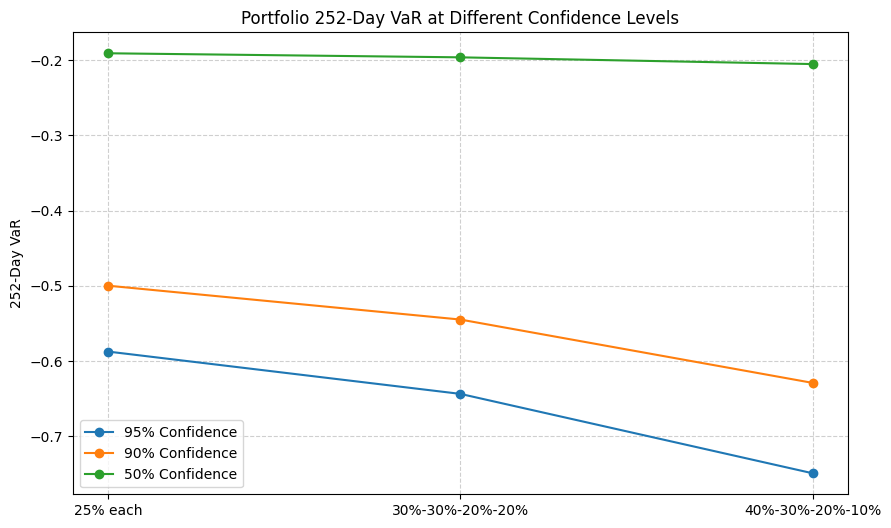

In [55]:
import matplotlib.pyplot as plt
import numpy as np

weights_list = [
    [0.25, 0.25, 0.25, 0.25],
    [0.30, 0.30, 0.20, 0.20],
    [0.40, 0.30, 0.20, 0.10]
]   
labels = ['25% each', '30%-30%-20%-20%', '40%-30%-20%-10%']
VaR_dict_252 = {"95%": [], "90%": [], "50%": []}
for weights in weights_list:
    portfolio_log_returns = log_returns.dot(weights)
    mu = portfolio_log_returns.mean()
    sigma = portfolio_log_returns.std(ddof=1)

    VaR_dict_252["95%"].append(norm.ppf(1 - 0.95, 252*mu, np.sqrt(252)*sigma))
    VaR_dict_252["90%"].append(norm.ppf(1 - 0.90, 252*mu, np.sqrt(252)*sigma))
    VaR_dict_252["50%"].append(norm.ppf(1 - 0.50, 252*mu, np.sqrt(252)*sigma))
x = np.arange(len(labels))
plt.figure(figsize=(10,6))
plt.plot(x, VaR_dict_252["95%"], marker="o", label="95% Confidence")
plt.plot(x, VaR_dict_252["90%"], marker="o", label="90% Confidence")
plt.plot(x, VaR_dict_252["50%"], marker="o", label="50% Confidence")
plt.xticks(x, labels)
plt.ylabel("252-Day VaR")
plt.title("Portfolio 252-Day VaR at Different Confidence Levels")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [56]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
pltr.head()

Price,Close,High,Low,Open,Volume,Price Difference,Daily Return,Direction,ma50,ma252,Log Daily Return
Ticker,PLTR,PLTR,PLTR,PLTR,PLTR,,,,,,
Date,,,,,,,,,,,
2021-02-11,33.110001,35.980000,32.610001,35.790001,52094900,-1.200001,NaN,0,NaN,NaN,NaN
2021-02-12,31.910000,33.650002,31.340000,33.360001,60925600,-4.070000,-0.036243,0,NaN,NaN,0.036916
2021-02-16,27.840000,30.440001,27.299999,30.020000,180294300,-0.760000,-0.127546,0,NaN,NaN,0.136446
2021-02-17,27.080000,29.730000,27.000000,27.990000,151007000,-1.910000,-0.027299,0,NaN,NaN,0.027678
2021-02-18,25.170000,26.309999,24.500000,24.990000,313175100,3.830000,-0.070532,1,NaN,NaN,0.073143


In [58]:
# Due to the timezone issues, we extract and calculate appropriate stock market data for analysis
# Indicepanel is the DataFrame of our trading model

panel = pd.DataFrame(index=pltr.index)

# Dependent variable: PLTR daily returns
panel['PLTR_ret'] = pltr['Close'].pct_change()

# Independent variables: AAPL, SPY, GLD daily returns
panel['AAPL_ret'] = aapl['Close'].pct_change()
panel['SPY_ret']  = spy['Close'].pct_change()
panel['GLD_ret']  = gld['Close'].pct_change()

In [59]:
# Drop missing values (first row will be NaN due to pct_change)
panel = panel.dropna()

In [60]:
# Define Y and X
Y = panel['PLTR_ret']
X = panel[['AAPL_ret', 'SPY_ret', 'GLD_ret']]

In [61]:
# Add constant for regression intercept
import statsmodels.api as sm
X = sm.add_constant(X)

In [62]:
# Run regression
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               PLTR_ret   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     166.7
Date:                Wed, 11 Feb 2026   Prob (F-statistic):           7.03e-91
Time:                        11:54:54   Log-Likelihood:                 2409.9
No. Observations:                1254   AIC:                            -4812.
Df Residuals:                    1250   BIC:                            -4791.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      0.768      0.4

In [63]:
# Create lagged independent variables (1-day lag)
panel['AAPL_ret_lag1'] = panel['AAPL_ret'].shift(1)
panel['SPY_ret_lag1']  = panel['SPY_ret'].shift(1)
panel['GLD_ret_lag1']  = panel['GLD_ret'].shift(1)

# Drop missing values after lagging
panel = panel.dropna()

In [64]:
Y = panel['PLTR_ret']
X = panel[['AAPL_ret', 'SPY_ret', 'GLD_ret',
           'AAPL_ret_lag1', 'SPY_ret_lag1', 'GLD_ret_lag1']]

import statsmodels.api as sm
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               PLTR_ret   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     85.23
Date:                Wed, 11 Feb 2026   Prob (F-statistic):           1.50e-89
Time:                        11:54:54   Log-Likelihood:                 2412.5
No. Observations:                1253   AIC:                            -4811.
Df Residuals:                    1246   BIC:                            -4775.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0009      0.001      0.927

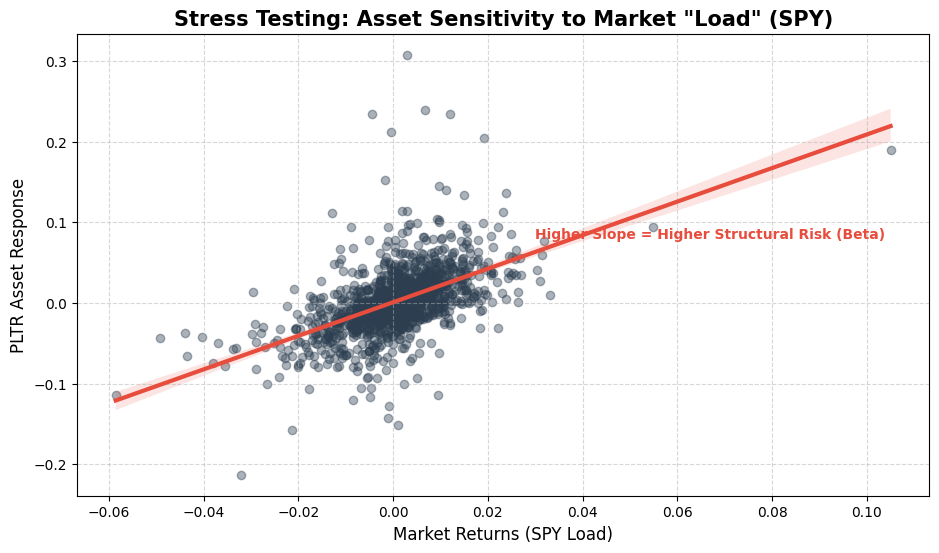

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11, 6))

# This creates the scatter points + the "Trend Line" of the market load
sns.regplot(x='SPY_ret', y='PLTR_ret', data=panel, 
            scatter_kws={'alpha':0.4, 'color':'#2c3e50'}, 
            line_kws={'color':'#e74c3c', 'lw':3})

plt.title('Stress Testing: Asset Sensitivity to Market "Load" (SPY)', fontsize=15, fontweight='bold')
plt.xlabel('Market Returns (SPY Load)', fontsize=12)
plt.ylabel('PLTR Asset Response', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Adding a 'Risk' annotation makes it look more expert
plt.annotate('Higher Slope = Higher Structural Risk (Beta)', xy=(0.02, 0.05), 
             xytext=(0.03, 0.08), color='#e74c3c', weight='bold')

plt.savefig('stress_test_load.png', dpi=300, bbox_inches='tight')
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [67]:
# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


In [68]:
# Fit model on training set
model = sm.OLS(y_train, X_train).fit()

In [69]:
# Predict on test set
y_pred = model.predict(X_test)

In [70]:
# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [71]:
print("Test RMSE:", rmse)
print("Test R²:", r2)

Test RMSE: 0.031189631722636463
Test R²: 0.3800963466660895


In [72]:
# Put results into a DataFrame for easy comparison
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
}, index=y_test.index)

In [73]:
# Add signal column (up if Predicted > 0, down if Predicted < 0)
results["Signal"] = results["Predicted"].apply(lambda x: "📈 Up" if x > 0 else "📉 Down")

In [74]:
print(results.tail(10))  # Show last 10 rows

              Actual  Predicted  Signal
Date                                   
2026-01-28 -0.050392  -0.001347  📉 Down
2026-01-29 -0.034890  -0.006933  📉 Down
2026-01-30 -0.034703  -0.008790  📉 Down
2026-02-02  0.007981   0.024159    📈 Up
2026-02-03  0.068490  -0.010560  📉 Down
2026-02-04 -0.116164  -0.015840  📉 Down
2026-02-05 -0.068296  -0.026787  📉 Down
2026-02-06  0.045304   0.043641    📈 Up
2026-02-09  0.051582   0.008913    📈 Up
2026-02-10 -0.023791  -0.006973  📉 Down


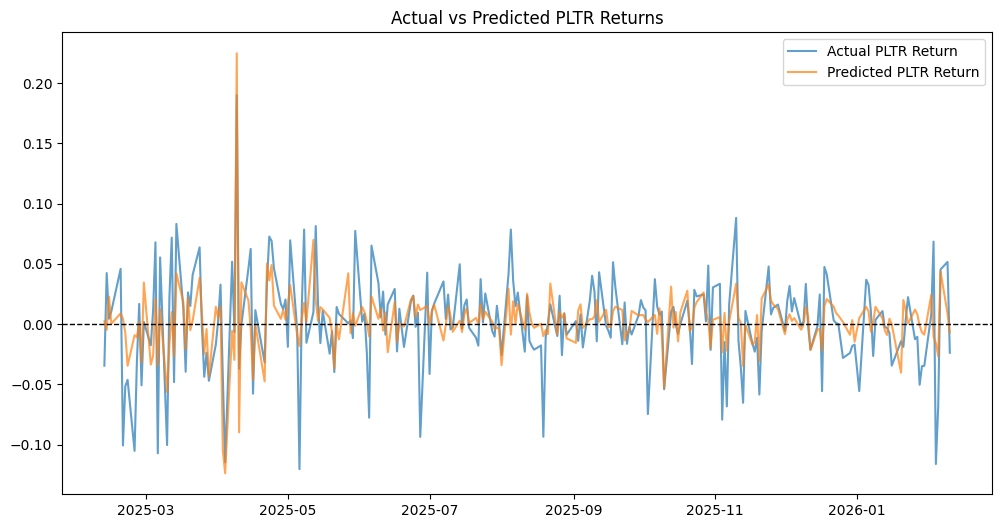

In [75]:
# Plot actual vs predicted returns
plt.figure(figsize=(12,6))
plt.plot(results.index, results["Actual"], label="Actual PLTR Return", alpha=0.7)
plt.plot(results.index, results["Predicted"], label="Predicted PLTR Return", alpha=0.7)
plt.axhline(0, color="black", linewidth=1, linestyle="--")  # Zero line
plt.legend()
plt.title("Actual vs Predicted PLTR Returns")
plt.show()

In [76]:
# Compare actual vs predicted direction
results["Correct"] = ((results["Actual"] > 0) & (results["Predicted"] > 0)) | \
                     ((results["Actual"] < 0) & (results["Predicted"] < 0))

accuracy = results["Correct"].mean() * 100
print(f"Directional Accuracy: {accuracy:.2f}%")

Directional Accuracy: 71.31%


In [77]:
# Take the last row of features 
latest_X = X.iloc[[-1]]   # double brackets keep it as DataFrame

# Predict tomorrow's PLTR return
predicted_tomorrow = model.predict(latest_X)[0]

print("Predicted PLTR return for tomorrow:", predicted_tomorrow)

if predicted_tomorrow > 0:
    print("📈 Model suggests PLTR will go UP tomorrow")
else:
    print("📉 Model suggests PLTR will go DOWN tomorrow")

Predicted PLTR return for tomorrow: -0.006973483506229219
📉 Model suggests PLTR will go DOWN tomorrow
